In [1]:
import pandas as pd
train = pd.read_csv("./titanic/train.csv")
test = pd.read_csv("./titanic/train.csv")

#### 현재 수행하고자 하는 것
- feature와 target(Survived)의 상관관계 확인

# 📊 **수치형 데이터: 이산형 vs 연속형**

## 🔹 이산형 데이터 (Discrete Data)
- **정의**: 셀 수 있는 데이터, 개별적인 값으로만 존재
- **특징**
  - 값 사이에 간격이 있음
  - 정수 형태로 표현됨
  - 무한히 세밀하게 쪼갤 수 없음
- **예시**
  - 학생 수 (25명, 26명, …)
  - 주사위 눈 (1, 2, 3, 4, 5, 6)
  - 자동차 대수

---

## 🔹 연속형 데이터 (Continuous Data)
- **정의**: 셀 수 없고, 연속적인 구간 내 모든 값이 가능한 데이터
- **특징**
  - 실수 형태로 표현됨
  - 값 사이에 간격이 없음 (무한히 세밀하게 쪼갤 수 있음)
  - 측정 단위에 따라 무한히 많은 값 존재 가능
- **예시**
  - 키 (170.2cm, 170.25cm, …)
  - 체중 (65.3kg, 65.33kg, …)
  - 시간 (1.23초, 1.234초, …)

---

## 🔑 비교 표

| 구분        | 이산형 데이터 (Discrete) | 연속형 데이터 (Continuous) |
|-------------|--------------------------|-----------------------------|
| 값의 특성   | 셀 수 있음 (Countable)  | 연속 구간에서 무한히 존재 |
| 표현 방식   | 정수 (Integer)          | 실수 (Real Number)         |
| 값의 간격   | 불연속 (띄엄띄엄)       | 연속 (끊김 없음)           |
| 예시        | 학생 수, 주사위 눈      | 키, 체중, 시간             |


# 📊 **데이터 유형: 범주형 데이터 (Categorical Data)**

## 🔹 범주형 데이터 (Categorical Data)
- **정의**: 숫자의 크기 의미 없이, **특정 범주(집단)에 속함을 나타내는 데이터**
- **특징**
  - 수학적 연산 불가능 (덧셈, 평균 X)
  - **범주 간 구분**은 가능하나 크기 비교는 불가능 (명목형) 또는 제한적 가능(순서형)
  - 보통 **라벨(Label)** 또는 **카테고리(Category)** 값으로 표현
- **예시**
  - 성별 (남, 여)
  - 혈액형 (A, B, O, AB)
  - 지역명 (서울, 부산, 대구)

---

## 🔹 범주형 데이터의 세부 유형
### 1. 명목형 (Nominal Data)
- 범주 간 **순서 없음**
- 단순 분류, 구분 목적
- 예시: 성별, 혈액형, 국적

### 2. 순서형 (Ordinal Data)
- 범주 간 **순서 있음**
- 간격은 의미 없음 (순위만 존재)
- 예시: 학점(A, B, C, D), 만족도(매우 만족, 보통, 불만족)

---

## 🔑 비교 표

| 구분        | 범주형 데이터 (Categorical) |
|-------------|------------------------------|
| 값의 특성   | 집단(카테고리) 구분용       |
| 연산 가능 여부 | 수학적 연산 불가 (집계, 빈도는 가능) |
| 세부 유형   | 명목형(Nominal), 순서형(Ordinal) |
| 예시        | 성별, 혈액형, 학점, 만족도 |



In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 범주형 Feature와 Survived 간의 상관관계 비교

### Sex(범주형 데이터) 와 Survived 간의 상관관계 탐색

In [4]:
def feature_survived_rate(feature):
    survived = train.loc[train["Survived"] == 1, feature].value_counts()

    dead = train.loc[train["Survived"] == 0, feature].value_counts()

    df = pd.DataFrame([survived, dead])
    df.index = ["Survived", "Dead"]

    return df
    

### 해당 feature의 label 종류 확인
- male
- female

In [5]:
train['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

### 결측치 확인

In [6]:
train['Sex'].isnull().sum()

np.int64(0)

#### 해당 feature('Sex')와 Survived 간의 관계 시각화

In [7]:
df = feature_survived_rate('Sex')
df.head()

Sex,female,male
Survived,233,109
Dead,81,468


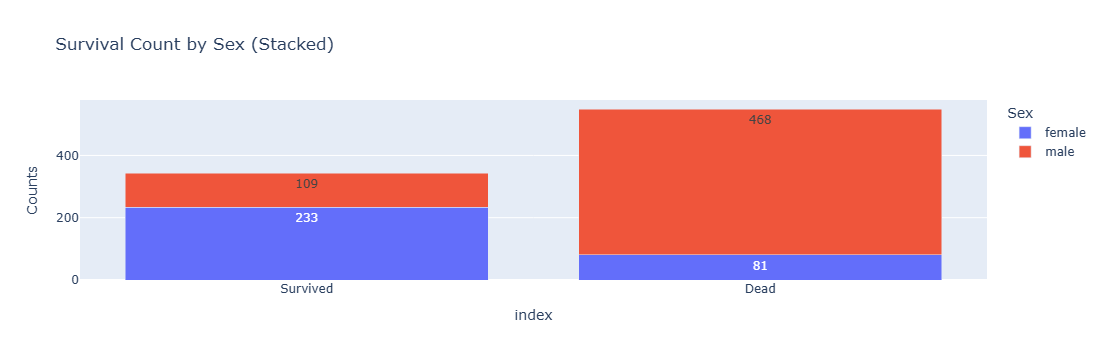

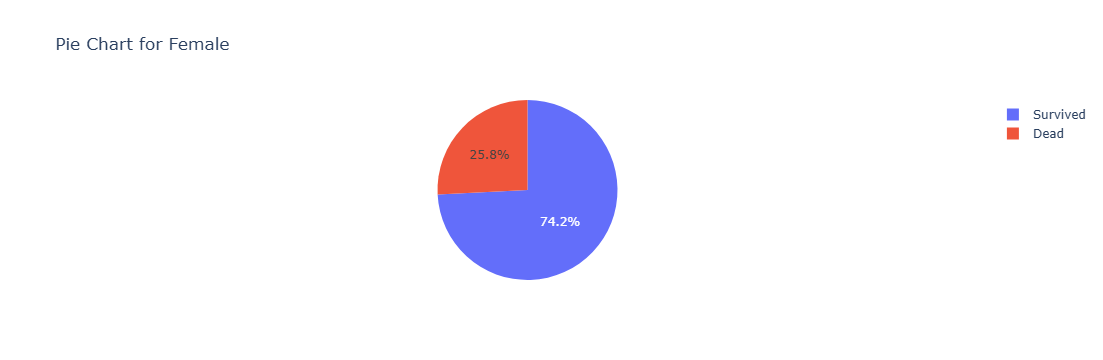

In [9]:
import plotly.express as px

fig = px.bar(
    df,
    x=df.index,
    y=["female", "male"],
    barmode="stack",
    text_auto=True,
    title="Survival Count by Sex (Stacked)",
    labels= {
        "x": "Status",
        "value": "Counts",
        "variable": "Sex"
    }
)

fig.show()


fig_female = px.pie(
    data_frame=df,
    names=df.index,
    values="female",
    title="Pie Chart for Female"
)

fig_female.show()

### Pclass(범주형 데이터) 와 Survived 간의 상관관계 탐색

#### Pclass 관련 카테고리 수 확인
- 1등석
- 2등석
- 3등석

In [10]:
train["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

#### 결측치 확인

In [11]:
train["Pclass"].isnull().sum()

np.int64(0)

In [12]:
df = feature_survived_rate("Pclass")
df.head()

Pclass,1,3,2
Survived,136,119,87
Dead,80,372,97


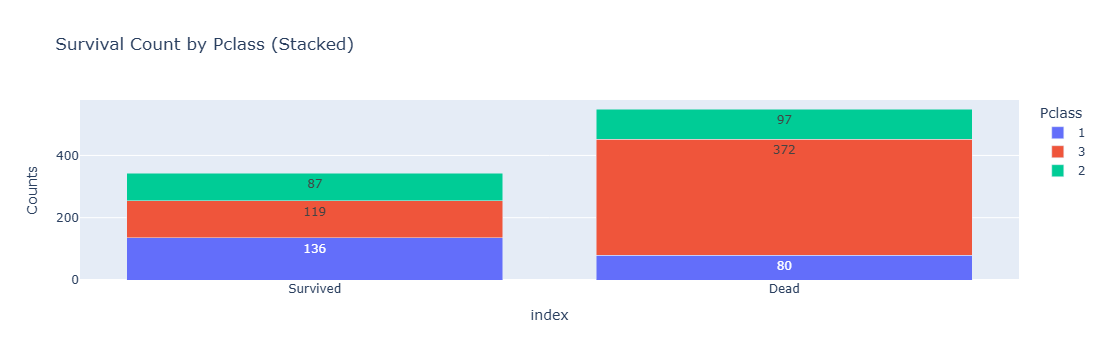

In [14]:
import plotly.express as px

fig = px.bar(
    df,
    x=df.index,
    y=df.columns,
    barmode="stack",
    text_auto=True,
    title="Survival Count by Pclass (Stacked)",
    labels= {
        "x": "Status",
        "value": "Counts",
        "variable": "Pclass"
    }
)

fig.show()


In [20]:
df = df.transpose()
df.head()

Pclass,1,3,2
Survived,136,119,87
Dead,80,372,97


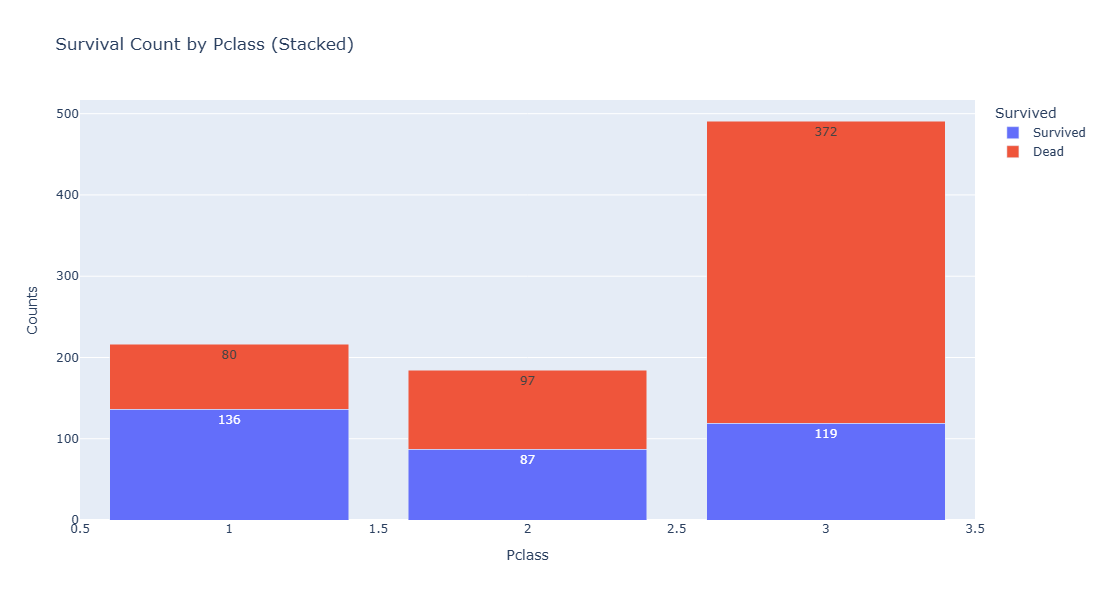

In [19]:
import plotly.express as px

fig = px.bar(
    df,
    x=df.index,
    y=df.columns,
    barmode="stack",
    text_auto=True,
    title="Survival Count by Pclass (Stacked)",
    labels= {
        "x": "Status",
        "value": "Counts",
        "variable": "Survived"
    }
)

fig.update_layout(width=800, height=600)

fig.show()


#### Pclass에 따른 Survived 비율 
- 생존률 비교: 1등석 > 2등석 > 3등석
- Pclass와 Survived 간에는 유의미한 상관관계가 있다고 볼 수 있음 

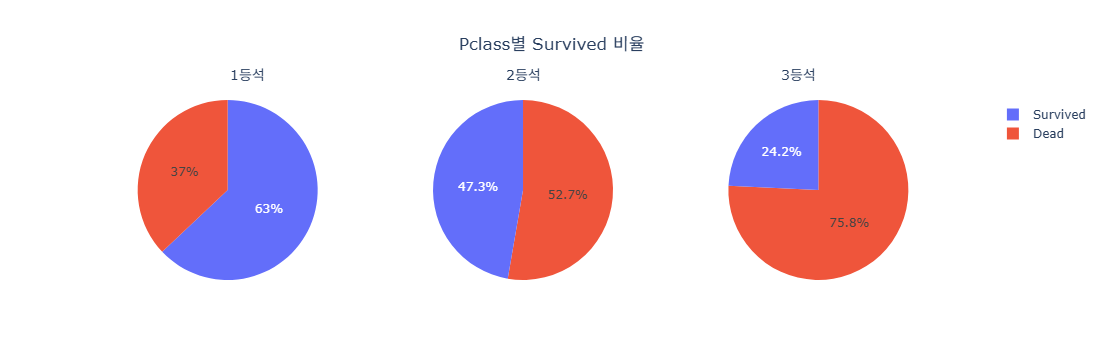

In [25]:
import plotly.graph_objects as go

fig = go.Figure()


fig.add_trace(
    go.Pie(
        labels=df.index,
        name="1등석",
        values=df[1],
        domain={"x": [0.00, 0.33], "y": [0, 1]}
    )
)

fig.add_trace(
    go.Pie(
        labels=df.index,
        name="2등석",
        values=df[2],
        domain={"x": [0.33, 0.66], "y": [0, 1]}
    )
)

fig.add_trace(
    go.Pie(
        labels=df.index,
        name="3등석",
        values=df[3],
        domain={"x": [0.66, 0.99], "y": [0, 1]}
    )
)

# 전체 제목
fig.update_layout(
    title_text="Pclass별 Survived 비율",
    title_x=0.5  # 중앙 정렬
)

fig.update_layout(
    annotations=[
        dict(text="1등석", x=0.165, y=1.20, showarrow=False, font_size=14),
        dict(text="2등석", x=0.495, y=1.20, showarrow=False, font_size=14),
        dict(text="3등석", x=0.825, y=1.20, showarrow=False, font_size=14)
    ]
)



In [70]:
train = pd.read_csv("./titanic/train.csv")
test = pd.read_csv("./titanic/test.csv")

### 항구(Embarked)별 Survived 상관관계 확인

In [71]:
train["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

#### 결측치 확인 
- 결측치 2개 존재
- 향후 결측치 제거 또는 치환하여 처리할 수 있음

In [72]:
train["Embarked"].isnull().sum()

np.int64(2)

In [73]:
df = feature_survived_rate("Embarked")
df.head()

Embarked,S,C,Q
Survived,217,93,30
Dead,427,75,47


In [74]:
df = df.transpose()

#### 상관관계 확인
- S 항구에서 탑승했을 경우, 사망률이 좀 더 높은 것으로 확인됨
- Survived 여부에 큰 영향을 미칠 가능성이 존재하는지 명확하지는 않음 

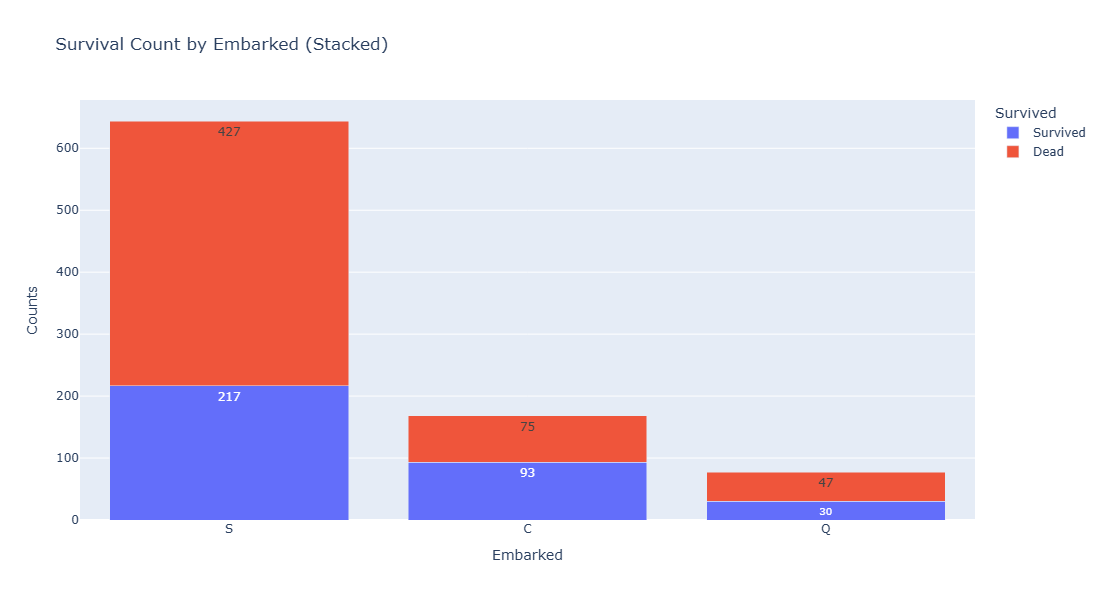

In [75]:
import plotly.express as px

fig = px.bar(
    df,
    x=df.index,
    y=df.columns,
    barmode="stack",
    text_auto=True,
    title="Survival Count by Embarked (Stacked)",
    labels= {
        "x": "Status",
        "value": "Counts",
        "variable": "Survived"
    }
)

fig.update_layout(width=800, height=600)

fig.show()


In [83]:
train = pd.read_csv("./titanic/train.csv")
test = pd.read_csv("./titanic/test.csv")
df = feature_survived_rate("Embarked")
df.head()

Embarked,S,C,Q
Survived,217,93,30
Dead,427,75,47


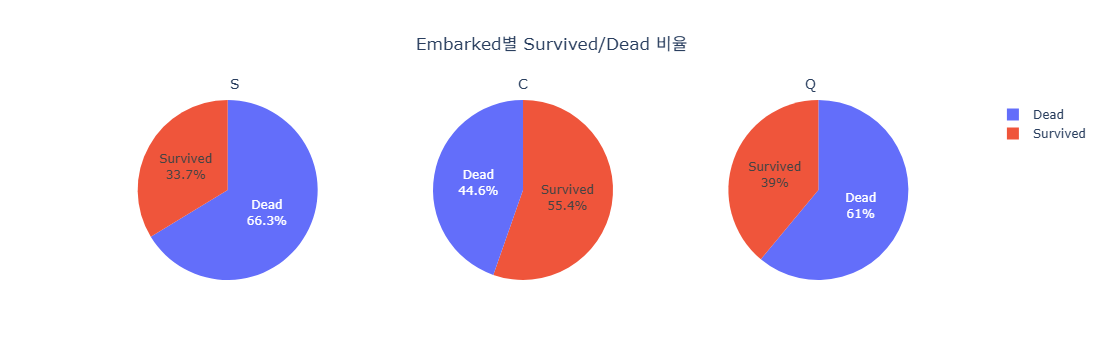

In [84]:
import plotly.graph_objects as go

fig = go.Figure()

# Pie for S
fig.add_trace(
    go.Pie(
        labels=df.index,         # ['Survived', 'Dead']
        values=df["S"],        # [217, 427]
        name="S",
        domain={"x": [0.00, 0.33], "y": [0, 1]},
        textinfo="label+percent"
    )
)

# Pie for C
fig.add_trace(
    go.Pie(
        labels=df.index,
        values=df["C"],
        name="C",
        domain={"x": [0.33, 0.66], "y": [0, 1]},
        textinfo="label+percent"
    )
)

# Pie for Q
fig.add_trace(
    go.Pie(
        labels=df.index,
        values=df["Q"],
        name="Q",
        domain={"x": [0.66, 0.99], "y": [0, 1]},
        textinfo="label+percent"
    )
)

# 전체 제목
fig.update_layout(
    title_text="Embarked별 Survived/Dead 비율",
    title_x=0.5,
    annotations=[
        dict(text="S", x=0.165, y=1.15, showarrow=False, font_size=14, xref="paper", yref="paper"),
        dict(text="C", x=0.495, y=1.15, showarrow=False, font_size=14, xref="paper", yref="paper"),
        dict(text="Q", x=0.825, y=1.15, showarrow=False, font_size=14, xref="paper", yref="paper")
    ]
)

fig.show()
